## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$:
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F)
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [ ]:
import torch
import numpy as np

In [ ]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


In [ ]:
def conv(x, kernel, stride, pad):
    # YOUR CODE IS HERE
    x_pad = np.pad(x, pad_width = pad, mode = 'constant')
    H_size, W_size = x_pad.shape
    H_outsize = 1 + (H_size - kernel.shape[0]) // stride
    W_outsize = 1 + (W_size - kernel.shape[0]) // stride
    result = np.zeros((H_outsize, W_outsize))
    for i in range(0, (H_size - kernel.shape[0] + 1), stride):
      for j in range(0, (W_size - kernel.shape[0] + 1), stride):
        result[i//stride, j//stride] = np.sum(x_pad[i:i+kernel.shape[0], j:j+kernel.shape[0]] * kernel)
    return result


In [ ]:
vert = conv(M, sobel_kernel_vert.numpy(), stride = 1, pad = 1)
print(f"Filt: sobel_kernel_vert:\n{vert}")

hori = conv(M, sobel_kernel_hor.numpy(), stride = 1, pad = 1)
print(f"Filt: sobel_kernel_hor:\n{hori}")

Filt: sobel_kernel_vert:
[[  6.   6.  -3.  -3.   6.  -6.]
 [ 16.   8.  -4.  -4.   8. -16.]
 [ 19.   8.  -4.  -4.   8. -19.]
 [ 13.   8.  -4.  -4.   8. -13.]
 [ 16.   8.  -4.  -4.   8. -16.]
 [ 18.   6.  -3.  -3.   6. -18.]]
Filt: sobel_kernel_hor:
[[ 10.  16.  17.  15.  16.  14.]
 [ 18.  24.  24.  24.  24.  18.]
 [ -9. -12. -12. -12. -12.  -9.]
 [ -9. -12. -12. -12. -12.  -9.]
 [ 18.  24.  24.  24.  24.  18.]
 [-10. -16. -17. -15. -16. -14.]]


Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

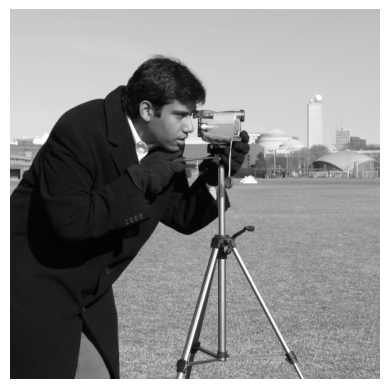

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

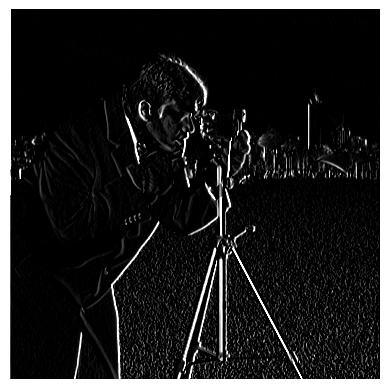

In [ ]:
camera_vertic = conv(camera, sobel_kernel_vert.numpy(), 1, 1)
plt.figure()
plt.imshow(camera_vertic.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

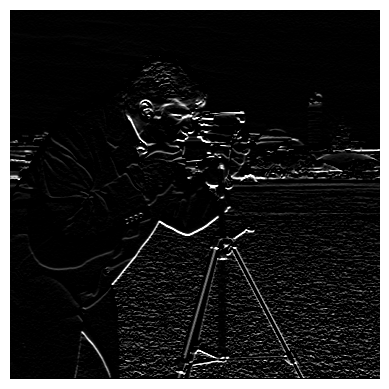

In [ ]:
camera_horiz= conv(camera, sobel_kernel_hor.numpy(), 1, 1)
plt.figure()
plt.imshow(camera_horiz.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

Допишите код ниже и проинтерпретируйте полученный результат:

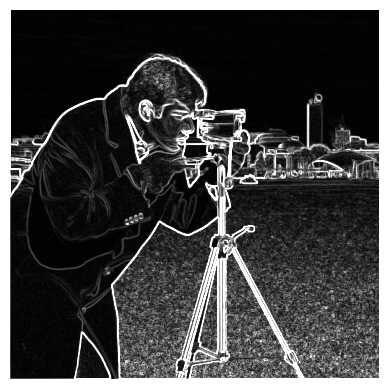

In [ ]:
camera_s_hor_filter = conv(camera, sobel_kernel_hor.numpy(), 1, 1)# результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera, sobel_kernel_vert.numpy(), 1, 1)# результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.axis("off");

C помощью применения 2 фильтров мы смогли выделить одновременно горизонтальные и вертикальные границы предметов на фото.

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [ ]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 20 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# !wget https://storage.googleapis.com/ibeans/train.zip
# !wget https://storage.googleapis.com/ibeans/validation.zip
# !wget https://storage.googleapis.com/ibeans/test.zip

# clear_output()

In [ ]:
# !unzip train.zip
# !unzip validation.zip
# !unzip test.zip

# clear_output()

In [ ]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)

        transformed_img = self._transforms_for_plot(image)

        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]

        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [ ]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

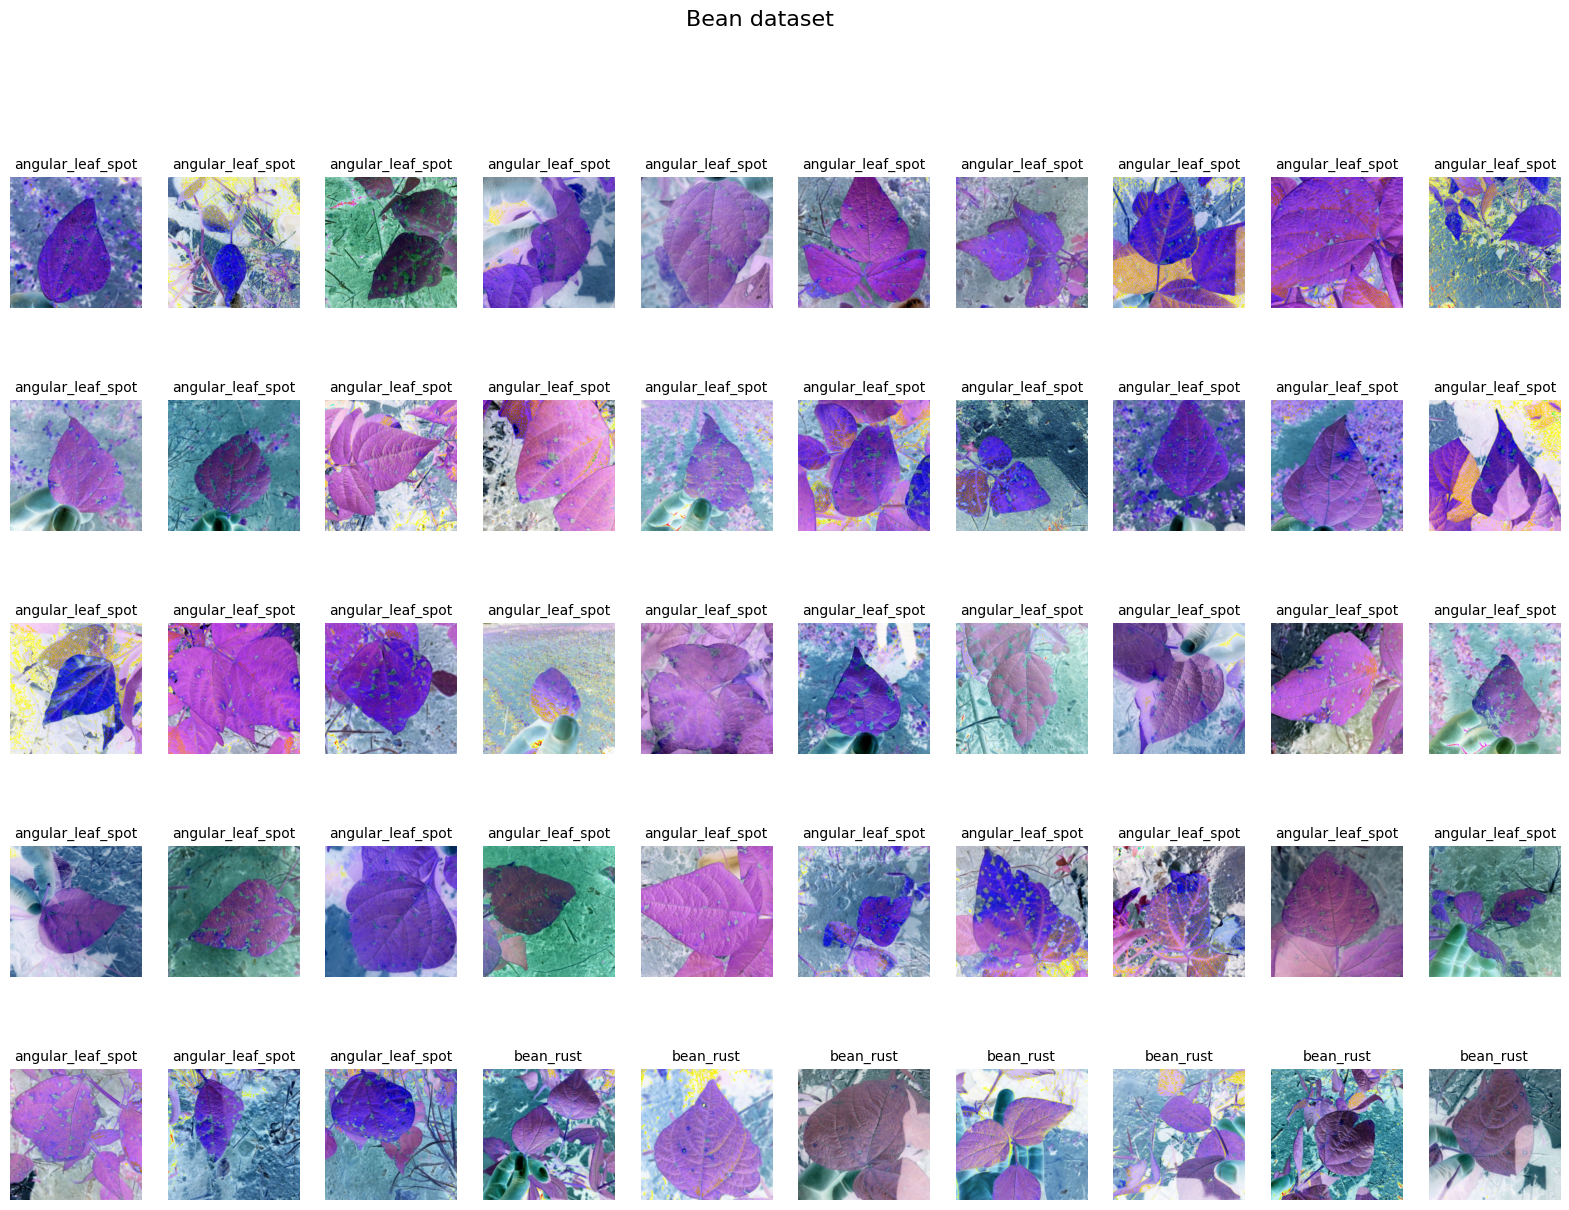

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)

fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

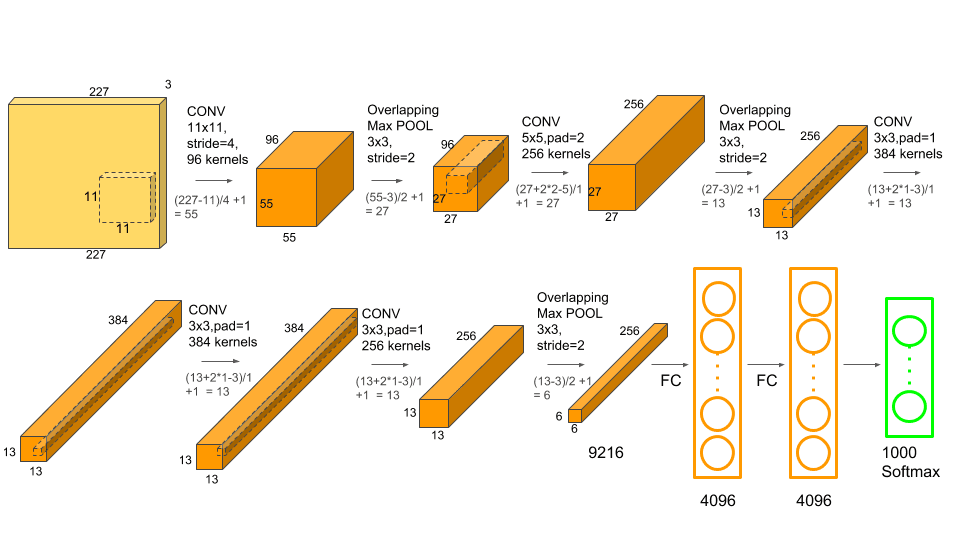

In [ ]:
N_CLASSES = len(train_dataset._number_to_labels)# определите число классов в данных
LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, number_label_class=N_CLASSES):
        super().__init__()
         # YOUR CODE IS HERE
        self.number_label_class = number_label_class
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=9216, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=self.number_label_class)
        )




    def forward(self,x):
        # YOUR CODE IS HERE
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)

        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [ ]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """

    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model -
    dataloader -
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [ ]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # Оптимизатор
criterion = nn.CrossEntropyLoss() # Функция потерь

08:46:38 --- Epoch: 0	Train loss: 1.0982	Valid loss: 1.1221	Train accuracy: 33.37	Valid accuracy: 33.08
08:47:08 --- Epoch: 1	Train loss: 1.0647	Valid loss: 1.1246	Train accuracy: 55.90	Valid accuracy: 56.39
08:47:40 --- Epoch: 2	Train loss: 1.0815	Valid loss: 1.0362	Train accuracy: 58.70	Valid accuracy: 57.14
08:48:12 --- Epoch: 3	Train loss: 0.9360	Valid loss: 0.8424	Train accuracy: 67.31	Valid accuracy: 65.41
08:48:42 --- Epoch: 4	Train loss: 0.8566	Valid loss: 0.7956	Train accuracy: 68.96	Valid accuracy: 67.67
08:49:11 --- Epoch: 5	Train loss: 0.7670	Valid loss: 0.8220	Train accuracy: 60.83	Valid accuracy: 53.38
08:49:40 --- Epoch: 6	Train loss: 0.7150	Valid loss: 0.6842	Train accuracy: 75.05	Valid accuracy: 73.68
08:50:09 --- Epoch: 7	Train loss: 0.6343	Valid loss: 0.7028	Train accuracy: 72.53	Valid accuracy: 63.16
08:50:38 --- Epoch: 8	Train loss: 0.6192	Valid loss: 0.7603	Train accuracy: 66.73	Valid accuracy: 60.90
08:51:07 --- Epoch: 9	Train loss: 0.6245	Valid loss: 0.7833	Trai

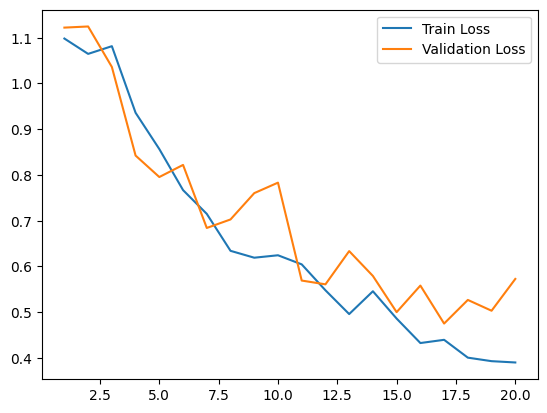

In [ ]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

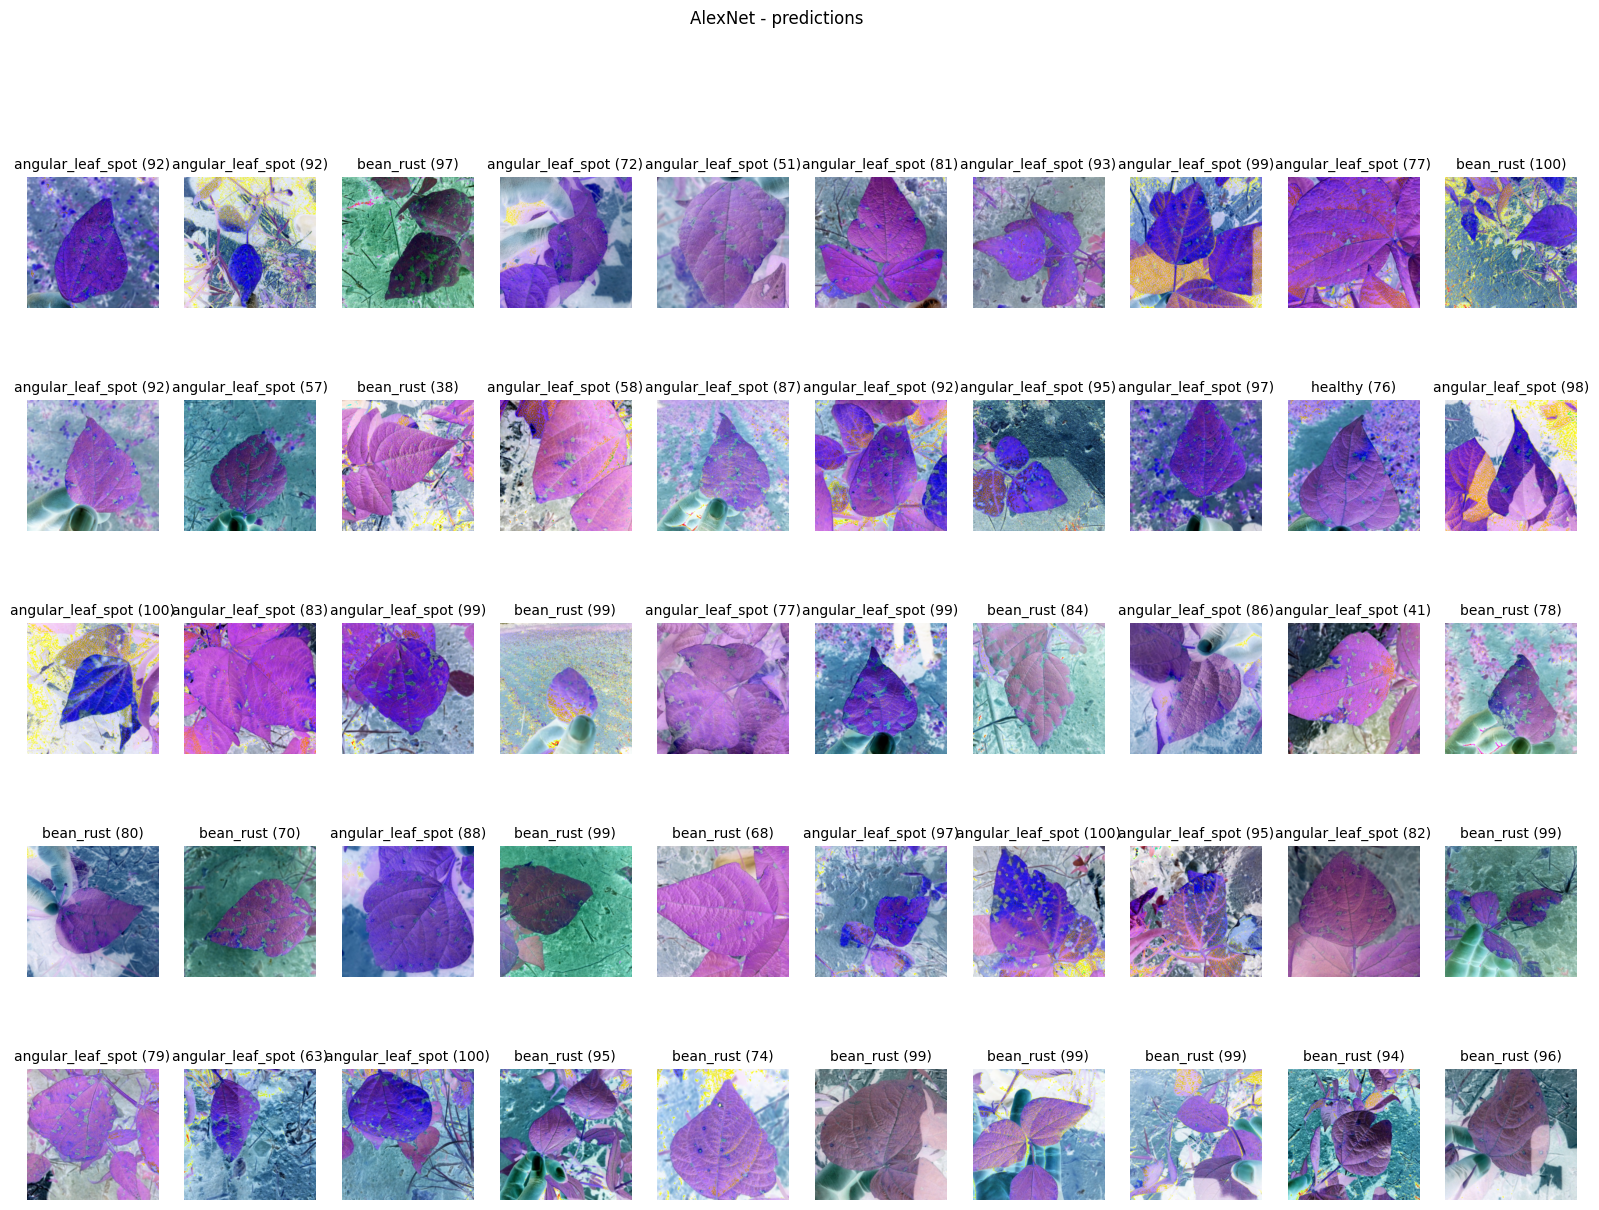

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))

    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))

    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"

    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

Модель работает неплохо. Но например ошибается в классификации bean rust, когда на фото больше одного листа (тройной лист). И при классификации фотографий, где лист обрезан.

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

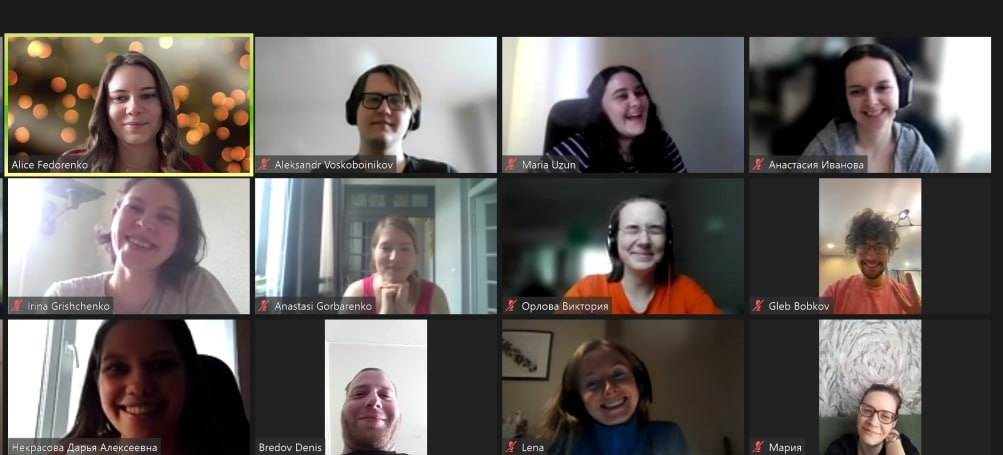

In [2]:
from IPython.display import Image
Image('../img/img.jpg')

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**